In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
j = np.ones((3,3))
h = np.ones((3,1))

h + j


array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [119]:
class LogisticRegression():
    def __init__(self):
        
        #initializing empty variables
        self.X_train = None
        self.y_train = None
        
        self.alpha = None
        self.W = None
        self.b = None
        
        self.n_features = None
        self.m = None #num of examples in train set
        self.epochs = None
        
    def set_model(self, X_train, y_train, alpha=0.1, epochs=100):
        #assigning variables
        
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha
        self.epochs = epochs
        
        self.m = X_train.shape[0]
        self.n_features = X_train.shape[1]
        
        #initialize params
        self.W = np.zeros((self.n_features, 1))
        self.b = 0
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    def predict(self, X):
                
        predictions = np.dot(X, self.W) + float(self.b)
        transformed_preds = self._sigmoid(predictions)        
        return transformed_preds
    
    
    def _cost(self, predictions):
        
        return   (-1 / self.m)* np.sum( y_train * np.log(predictions) + (1 - y_train) * np.log(1 - predictions)) 
        
        
    def fit(self):
        
        history = []
        
        for i in range(self.epochs):
            
            predictions = self.predict(X_train)
            
            
            cost = self._cost(predictions)
            print("i = {}; BinaryCrossEntropy = {}".format(i, cost))
            history.append(cost)
            
            errors = (predictions - self.y_train)            
            gradients_W =  (np.dot(self.X_train.T, errors)) / self.m
            gradient_b =   np.sum(errors) / self.m
            
            #correcting weights
            self.W = self.W - self.alpha * gradients_W
            self.b = self.b - self.alpha * gradient_b
            
            
            
            
        
        
        
        
        
        

### Testing my implementation on syntetic simple dataset

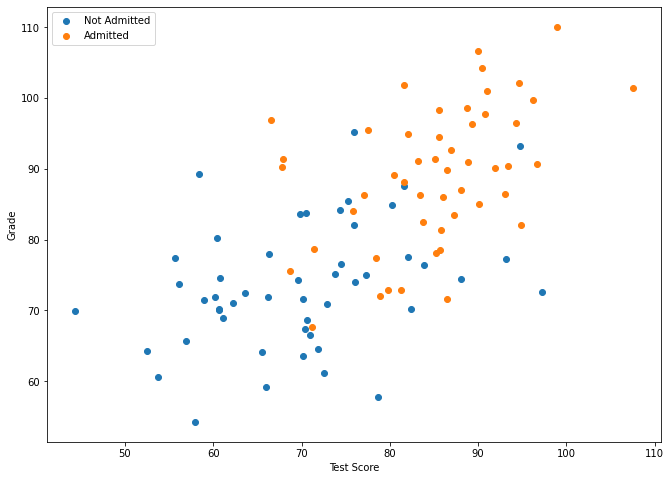

In [120]:
#Trying on a data

np.random.seed(2004)

# Generate data for not admitted students
mean_not_admitted = [70, 75]
cov_not_admitted = [[100, 50], [50, 100]]
not_admitted = np.random.multivariate_normal(mean_not_admitted, cov_not_admitted, size=50)

# Generate data for admitted students
mean_admitted = [85, 90]
cov_admitted = [[100, 50], [50, 100]]
admitted = np.random.multivariate_normal(mean_admitted, cov_admitted, size=50)

# Combine the data
X = np.vstack((not_admitted, admitted))
y = np.hstack((np.zeros(50), np.ones(50)))

# Plot the generated data

plt.figure(figsize=(11, 8))
plt.scatter(not_admitted[:, 0], not_admitted[:, 1], label="Not Admitted")
plt.scatter(admitted[:, 0], admitted[:, 1], label="Admitted")
plt.xlabel("Test Score")
plt.ylabel("Grade")
plt.legend()
plt.show()

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


stdscal = StandardScaler()

X = stdscal.fit_transform(X)


y = y.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [181]:

logreg = LogisticRegression()
logreg.set_model(X_train, y_train, 0.2, 500)

In [182]:
logreg.fit()

i = 0; BinaryCrossEntropy = 0.6931471805599454
i = 1; BinaryCrossEntropy = 0.660270109333171
i = 2; BinaryCrossEntropy = 0.6323074188364447
i = 3; BinaryCrossEntropy = 0.6084668458629379
i = 4; BinaryCrossEntropy = 0.5880650212528505
i = 5; BinaryCrossEntropy = 0.5705264105541716
i = 6; BinaryCrossEntropy = 0.5553735454159473
i = 7; BinaryCrossEntropy = 0.5422137106519926
i = 8; BinaryCrossEntropy = 0.5307251843551684
i = 9; BinaryCrossEntropy = 0.5206445970964446
i = 10; BinaryCrossEntropy = 0.5117560241519548
i = 11; BinaryCrossEntropy = 0.5038819068376593
i = 12; BinaryCrossEntropy = 0.49687565491402885
i = 13; BinaryCrossEntropy = 0.49061569161827706
i = 14; BinaryCrossEntropy = 0.48500069034798887
i = 15; BinaryCrossEntropy = 0.47994577415666595
i = 16; BinaryCrossEntropy = 0.47537948335813074
i = 17; BinaryCrossEntropy = 0.4712413517609644
i = 18; BinaryCrossEntropy = 0.46747996374218304
i = 19; BinaryCrossEntropy = 0.4640513910499031
i = 20; BinaryCrossEntropy = 0.46091792988559

In [183]:
preds = np.round(logreg.predict(X_test))

accuracy_score(preds, y_test)


0.88

In [184]:
import sklearn.linear_model

In [185]:
logreg2 = sklearn.linear_model.LogisticRegression()
logreg2.fit(X_train, y_train)


/home/stanislav/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [186]:
accuracy_score(logreg2.predict(X_test), y_test)

0.88

So, as you can see, my implementation performs exactly the same as LogReg from sklearn